# Using Husks

## Make a blended image 

In [2]:
import numpy as np
import pandas as pd
# from gnomon import husk
import os

In [3]:
# The file path format here is for unix. Can be altered for other platforms though
df = pd.read_csv("gnomon_data.csv")

In [5]:
df2 = pd.read_csv("data/data(correct_datetime).csv")

In [8]:
df['Datetime'] = df2['Datetime']

In [11]:
df.to_csv('gnomon_data.csv', index=False)

In [3]:
def alterFile(df):
    """
    Alter file path name in the data taken in from csv. Specify
    the current divider ('/' for unix, '\\' for windows) in the 
    split() line. No return, alters the data in place.
    """
    for i in df.index.values:
        arr = df.loc[i, 'Image filename'].split('\\')
        df.loc[i, 'Image filename'] = os.path.join(arr[0], arr[1])
#         df.loc[i, 'Image filename'] = arr[0] + '\\' + arr[1]

In [4]:
df.head()

,Datetime,Day,Image filename,Location,Purpose
0,2/4/2019 14:21,monday,week/img (1).jpg,outside,travel - walking
1,2/4/2019 14:25,monday,week/img (2).jpg,outside,travel - walking
2,2/4/2019 14:27,monday,week/img (3).jpg,outside,travel - walking
3,2/4/2019 14:30,monday,week/img (4).jpg,outside,travel - walking
4,2/4/2019 14:32,monday,week/img (5).jpg,outside,travel - walking


Picture resolutions are not identical. Resizing images...


/opt/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Images resized.


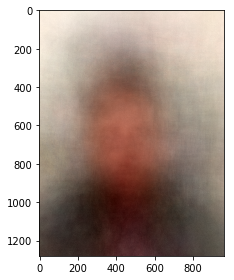

In [5]:
husky = husk()

# for i in df[df['Day'] == 'thursday'].index.values:
#     test.add_image(filename = df.loc[i, 'Image filename'])

# Read in all pictures to the husk object
for i in df.index.values:
    husky.add_image(filename = df.loc[i, 'Image filename'])

husky.rotate_all('r')

husky.blend()

%matplotlib inline
husky.show_comp()

In [6]:
  
def husk2imgDF(husk_obj):
    """
    Takes a husk object and converts its image list into an array of
    flattened arrays.
    """

    data = []
    for i in range(len(husk_obj.imgs)):
        data.append(husk_obj.imgs[i].flatten())
    
    return np.array(data)

In [7]:
X = husk2imgDF(husky)

# Use the Husk object with k-means clustering

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [9]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [10]:
# df = df.drop('Cluster', axis=1)

for i in range(len(kmeans.labels_)):
    df.loc[i, 'Cluster'] = kmeans.labels_[i] + 1

In [11]:
# Save dataframe with clusters added
df.to_csv("data_clusters.csv")

In [12]:
df

,Datetime,Day,Image filename,Location,Purpose,Cluster
0,2/4/2019 14:21,monday,week/img (1).jpg,outside,travel - walking,5.0
1,2/4/2019 14:25,monday,week/img (2).jpg,outside,travel - walking,5.0
2,2/4/2019 14:27,monday,week/img (3).jpg,outside,travel - walking,5.0
3,2/4/2019 14:30,monday,week/img (4).jpg,outside,travel - walking,5.0
4,2/4/2019 14:32,monday,week/img (5).jpg,outside,travel - walking,5.0
5,2/4/2019 14:35,monday,week/img (6).jpg,outside,travel - walking,2.0
6,2/4/2019 14:38,monday,week/img (7).jpg,outside,travel - walking,2.0
7,2/4/2019 14:41,monday,week/img (8).jpg,outside,travel - walking,5.0
8,2/4/2019 14:43,monday,week/img (9).jpg,outside,travel - walking,5.0
9,2/4/2019 14:46,monday,week/img (10).jpg,Founders Memorial Library,study,2.0


Saving image as: cluster5.jpg


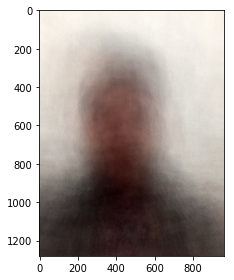

In [19]:
husky = husk()

for i in df[df['Cluster'] == 5].index.values:
    husky.add_image(filename = df.loc[i, 'Image filename'])

# # Read in all pictures to the husk object
# for i in df.index.values:
#     husky.add_image(filename = df.loc[i, 'Image filename'])

husky.rotate_all('r')

husky.blend('cluster5.jpg')

%matplotlib inline
husky.show_comp()

/opt/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


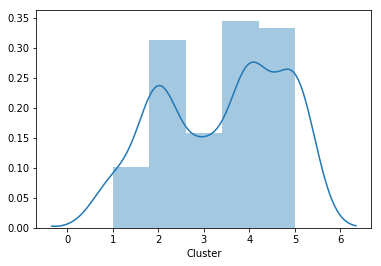

In [21]:
sns.distplot(df['Cluster'], bins=5)

# Build an adjacency matrix from Dataframe

In [9]:
df = pd.read_csv("data_clusters.csv")

In [6]:
adj_mat = pd.DataFrame(np.zeros(shape=(len(df.index.values), len(df.index.values))), dtype=int)

In [5]:
def makeAdjMat(df):
    adj_mat = pd.DataFrame(np.zeros(shape=(len(df.index.values), len(df.index.values))), dtype=int)
    for i in df.index.values:
        for j in df.index.values:
            # if photos are in same cluster, set appropriate cell in adj_mat to 1
            if df.loc[i, 'Cluster'] == df.loc[j, 'Cluster']:
                adj_mat.loc[i, j] = df.loc[i, 'Cluster']
    return adj_mat

In [8]:
adj_mat.to_csv('adjacency_matrix.csv', index=False)

In [15]:
df

,Datetime,Day,Image filename,Location,Purpose,Cluster
0,2/4/2019 14:21,monday,week/img (1).jpg,outside,travel - walking,5.0
1,2/4/2019 14:25,monday,week/img (2).jpg,outside,travel - walking,5.0
2,2/4/2019 14:27,monday,week/img (3).jpg,outside,travel - walking,5.0
3,2/4/2019 14:30,monday,week/img (4).jpg,outside,travel - walking,5.0
4,2/4/2019 14:32,monday,week/img (5).jpg,outside,travel - walking,5.0
5,2/4/2019 14:35,monday,week/img (6).jpg,outside,travel - walking,2.0
6,2/4/2019 14:38,monday,week/img (7).jpg,outside,travel - walking,2.0
7,2/4/2019 14:41,monday,week/img (8).jpg,outside,travel - walking,5.0
8,2/4/2019 14:43,monday,week/img (9).jpg,outside,travel - walking,5.0
9,2/4/2019 14:46,monday,week/img (10).jpg,Founders Memorial Library,study,2.0


In [13]:
newDF = pd.DataFrame()

i = 0
while i < len(df.index.values):
    clust = df.loc[i, "Cluster"]
    dt_beg = df.loc[i, "Datetime"]
    day_beg = df.loc[i, "Day"]
    grouped = 1
    i+=1
    
    while (i < len(df.index.values)) and (df.loc[i, "Cluster"] == clust):
        grouped += 1
        i+=1
        
    D = {"Datetime": (dt_beg, df.loc[i-1, "Datetime"]), 
         "Day": (day_beg, df.loc[i-1, "Day"]), 
         "Group_size": grouped, 
         "Cluster": clust}
    
    newDF = newDF.append(D, ignore_index=True)
    

In [24]:
newDF.to_csv('compressed_clusters_data.csv', index=False)

In [3]:
newDF = pd.read_csv('compressed_clusters_data.csv')

In [7]:
newMat = makeAdjMat(newDF)
newMat.to_csv('compressed_adj_mat.csv', index=False)